<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/labs/09-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 9: Train and Test ML Models

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

Print off the first document and its target classification to make sure its been downloaded correctly. What is the target name of the first document?

In [4]:
print(docs[0])


print(targets[0])


print(names[targets[0]])



From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7
rec.autos


The target name of the first document is rec.autos

## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. How many documents are there? What does the class balance look like? Specifically, plot a bar chart showing distribution of the categories (classes). Be sure to label the axis using the target names.

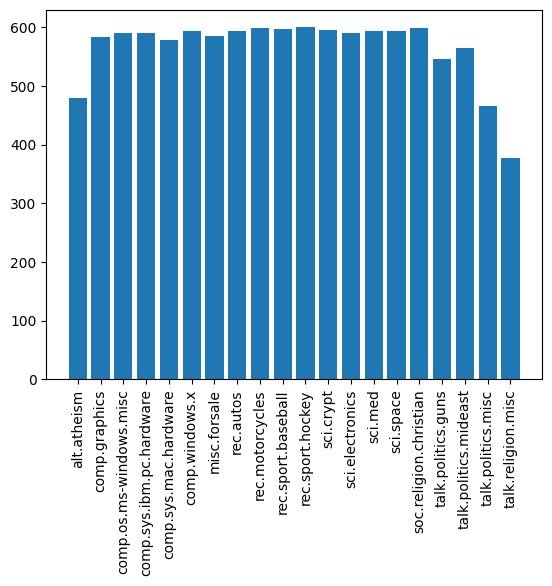

In [5]:
num_docs = len(docs)

class_count_balance = np.bincount(targets)

plt.bar(range(20), class_count_balance)

plt.xticks(range(20), names, rotation=90)

plt.show()

### Enter comments about your EDA below.

This dataset contains 11,314 documents. The class count is not perfectly balanced, but most categories fall between 450 and 600 documents. Classes like alt.atheism and talk.religion.misc have a smaller document count that the rest and fall a bit outside of that range. Because the data isn't perfectly balanced, the performance of the model might vary from category to category.

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no single correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

doc_nums = CountVectorizer(stop_words='english')

mtrx = doc_nums.fit_transform(docs)

print(mtrx.shape)

(11314, 129796)


## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mtrx, targets, test_size=0.2, random_state=42)

print(x_train.shape)

print(x_test.shape)

(9051, 129796)
(2263, 129796)


## Exercise 5: Train the Model

Using sklearn, train the following classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression
* Random Forests
* At least one other classification method NOT discussed in class.

Use cross validation to perform hyperparameter tuning.

In [13]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

kca = KNeighborsClassifier()

kca_params = {"n_neighbors": [2, 4], "weights": ["uniform", "distance"]}

kca_mtrx = GridSearchCV(kca, kca_params, cv=2, n_jobs=-1)

kca_mtrx.fit(x_train, y_train)

kca_best_estimate = kca_mtrx.best_estimator_

print(kca_best_estimate)

KNeighborsClassifier(n_neighbors=2, weights='distance')


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_params = {"max_depth": [None, 20], "min_samples_split": [2], "max_leaf_nodes": [None, 100]}

dt_mtrx = GridSearchCV(dt, dt_params, cv=2, n_jobs=-1)

dt_mtrx.fit(x_train, y_train)

dt_best_estimate = dt_mtrx.best_estimator_

print(dt_best_estimate)

DecisionTreeClassifier()


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr_params = {"C": [0.5, 1.2], "penalty": ["l2"], "solver": ["lbfgs"]}

lr_mtrx = GridSearchCV(lr, lr_params, cv=2, n_jobs=-1)

lr_mtrx.fit(x_train, y_train)

lr_best_estimate = lr_mtrx.best_estimator_

print(lr_best_estimate)

LogisticRegression(C=1.2, max_iter=1000)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


rf_params = {"n_estimators": [30], "max_depth": [20], "min_samples_split": [3]}

rf_mtrx = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1)

rf_mtrx.fit(x_train, y_train)

rf_best_estimate = rf_mtrx.best_estimator_

print(rf_best_estimate)




RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=30)


In [18]:
# Train the model using some other method
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

sgd_params = {"loss": ["hinge", "log_loss"], "alpha": [1e-5, 1e-3],
    "max_iter": [500, 1000]
}

sgd_mtrx = GridSearchCV(sgd, sgd_params, cv=2, n_jobs=-1)

sgd_mtrx.fit(x_train, y_train)

sgd_best_estimate = sgd_mtrx.best_estimator_

print(sgd_best_estimate)

SGDClassifier(alpha=0.001, loss='log_loss')


## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [25]:
from sklearn.metrics import accuracy_score


kca_predictions = kca_best_estimate.predict(x_test)

kca_accuracy = accuracy_score(y_test, kca_predictions)

In [26]:
dt_predictions = dt_best_estimate.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)

In [27]:
lr_predictions = lr_best_estimate.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)

In [28]:
# Evaluate the Random Forest Model

rf_predictions = rf_best_estimate.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)

In [29]:
# Evaluate the other chosen model

sgd_predictions = sgd_best_estimate.predict(x_test)

sgd_accuracy = accuracy_score(y_test, sgd_predictions)

In [30]:
print("KNN accuracy:", kca_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SGDClassifier Accuracy:", sgd_accuracy)


KNN accuracy: 0.6168802474591251
Decision Tree Accuracy: 0.6690234202386213
Logistic Regression Accuracy: 0.8908528501988511
Random Forest Accuracy: 0.6774193548387096
SGDClassifier Accuracy: 0.895271763146266


Discuss which one performs the best:

The SGDClassifier performs the best on this dataset with an accuracy score of 0.895, barely edging out the next highest performing model, Logistic Regression. The lowest performing model was the KNN model. This is in line with my expectations because linear models typically outperform tree-structured models with large, text based datasets.